In [10]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/14/cf/e382598f98be11bf51dd0bc60eca44a517f6793e3dc8b9d53634a144620c/matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a8/7e/cd93cab453720a5d6cb75588cc17dcdc08fc3484b9de98b885924ff61900/contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycl


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


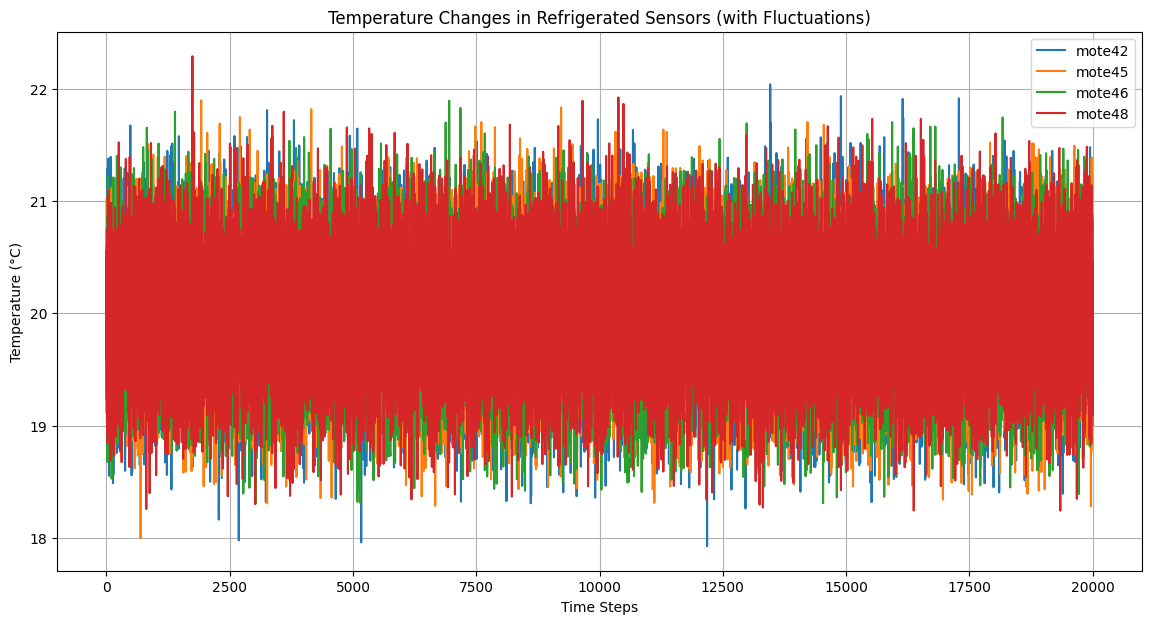

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 20000

# Define the nodes (sensors)
nodes = [f'mote{i}' for i in range(1, 51)]

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Stable room conditions for most sensors (normal fluctuations around 20°C with deviation of 0.2°C)
for node in nodes:
    if node not in ['mote42', 'mote45', 'mote46', 'mote48']:
        data[node] = np.random.normal(loc=20, scale=0.2, size=time_steps)  # Fluctuations around 20°C with deviation 0.2°C

# Nodes 42, 45, 46, and 48 have larger fluctuations (deviation of 0.5°C) around 20°C
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    data[node] = np.random.normal(loc=20, scale=0.5, size=time_steps)  # Fluctuations around 20°C with deviation 0.5°C

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_one.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes in Refrigerated Sensors (with Fluctuations)')
plt.legend()
plt.grid(True)
plt.show()


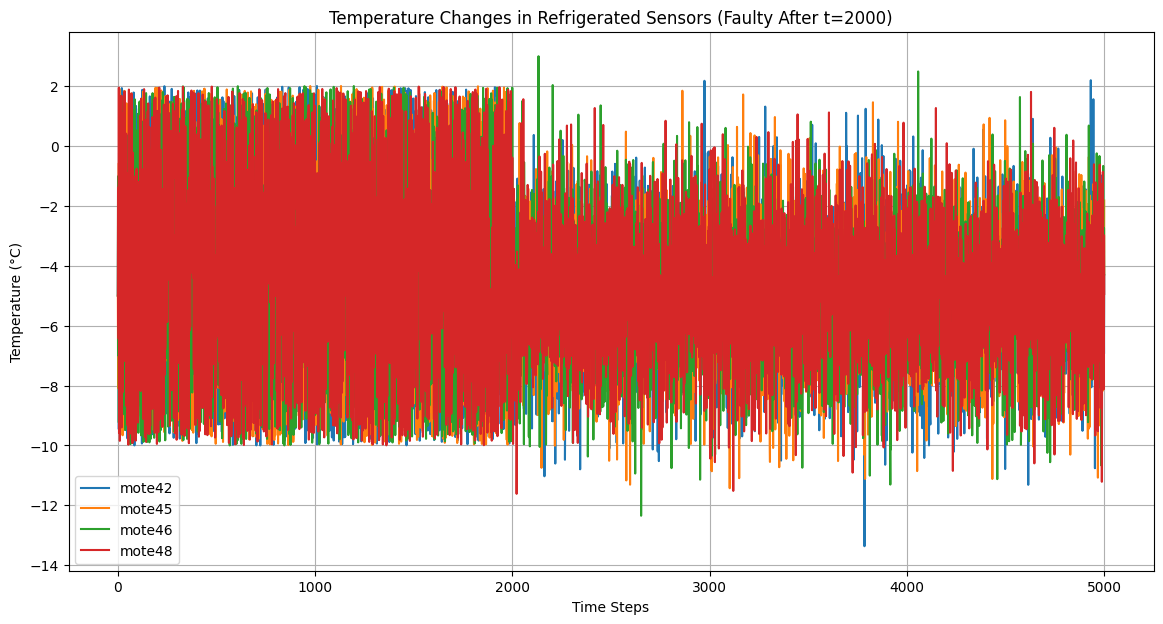

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 5000

# Define the nodes (sensors)
nodes = [f'mote{i}' for i in range(1, 51)]

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Stable room conditions for most sensors (normal fluctuations around 20°C)
for node in nodes:
    if node not in ['mote42', 'mote45', 'mote46', 'mote48']:
        data[node] = np.random.normal(loc=20, scale=0.1, size=time_steps)  # Small fluctuations around 20°C

# Refrigerated spaces for nodes 42, 45, 46, 48 (gradual changes between -10°C and 2°C for t <= 2000)
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    data[node][:2000] = np.random.uniform(low=-10, high=2, size=2000)  # Gradual changes between -10°C and 2°C
    data[node][:1] = -5  # Set the initial value to -5°C

# After t > 2000, rapid changes for nodes 42, 45, 46, 48 (faulty conditions)
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    data[node][2000:] = np.random.normal(loc=-5, scale=2, size=time_steps-2000)  # Rapid changes around -5°C

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_three.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes in Refrigerated Sensors (Faulty After t=2000)')
plt.legend()
plt.grid(True)
plt.show()


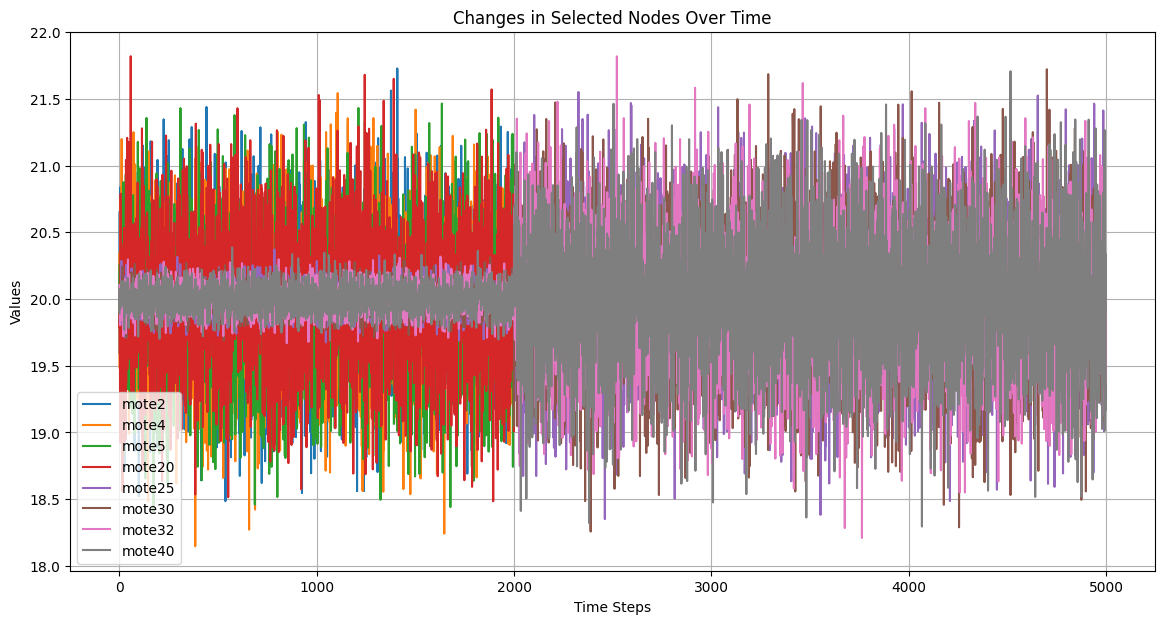

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 5000

# Define the nodes
nodes = [f'mote{i}' for i in range(1, 51)]

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Rapid changes for nodes 2, 4, 5, 20 from time steps 0 to 2000, then normal changes
for node in ['mote2', 'mote4', 'mote5', 'mote20']:
    data[node][:2000] = np.random.normal(loc=20, scale=0.5, size=2000)  # Rapid changes
    data[node][2000:] = np.random.normal(loc=20, scale=0.1, size=time_steps-2000)  # Normal changes

# Regular changes for nodes 25, 30, 32, 40 from time steps 0 to 2000, then rapid changes
for node in ['mote25', 'mote30', 'mote32', 'mote40']:
    data[node][:2000] = np.random.normal(loc=20, scale=0.1, size=2000)  # Normal changes
    data[node][2000:] = np.random.normal(loc=20, scale=0.5, size=time_steps-2000)  # Rapid changes

# Add normal changes to other nodes (remaining nodes remain stable or gradual throughout)
for node in nodes:
    if node not in ['mote2', 'mote4', 'mote5', 'mote20', 'mote25', 'mote30', 'mote32', 'mote40']:
        data[node] = np.random.normal(loc=20, scale=0.1, size=time_steps)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_two.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote2', 'mote4', 'mote5', 'mote20', 'mote25', 'mote30', 'mote32', 'mote40']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Changes in Selected Nodes Over Time')
plt.legend()
plt.grid(True)
plt.show()


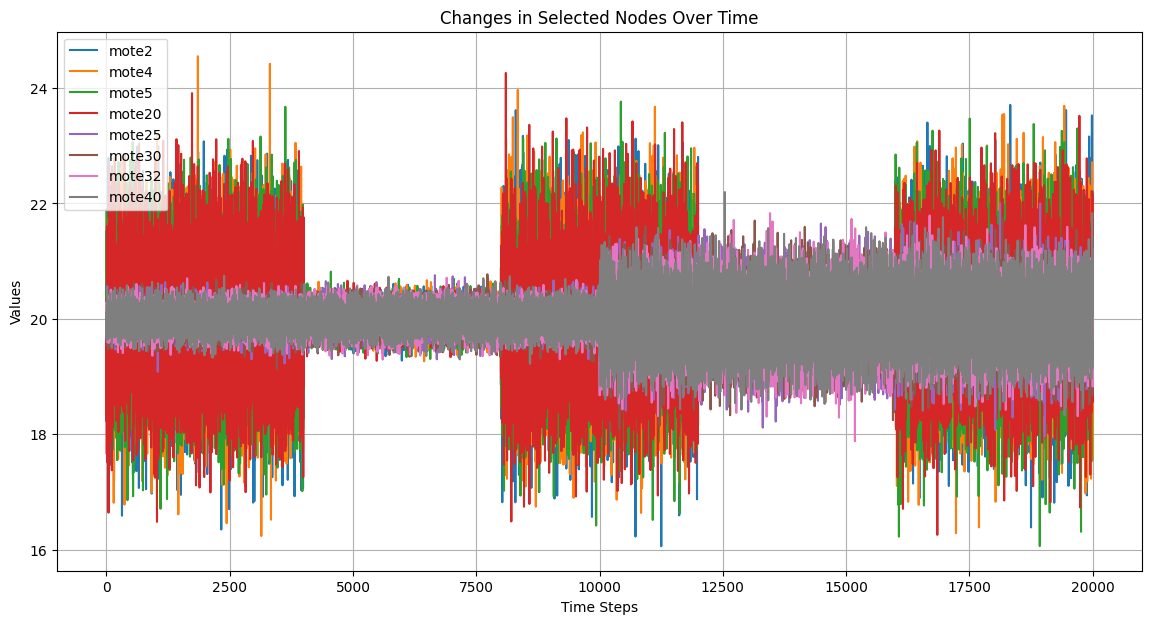

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 20000

# Define the nodes
nodes = [f'mote{i}' for i in range(1, 51)]

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Function to alternate between rapid and normal changes every 4000 time steps
def generate_alternating_changes(time_steps, interval, loc=20, rapid_scale=1.0, normal_scale=0.2):
    values = np.zeros(time_steps)
    for i in range(0, time_steps, interval):
        if (i // interval) % 2 == 0:  # Even intervals: rapid changes
            values[i:i+interval] = np.random.normal(loc=loc, scale=rapid_scale, size=min(interval, time_steps - i))
        else:  # Odd intervals: normal changes
            values[i:i+interval] = np.random.normal(loc=loc, scale=normal_scale, size=min(interval, time_steps - i))
    return values

# Apply alternating changes to nodes 2, 4, 5, 20
for node in ['mote2', 'mote4', 'mote5', 'mote20']:
    data[node] = generate_alternating_changes(time_steps, interval=4000, loc=20, rapid_scale=1.0, normal_scale=0.2)

# Regular changes for nodes 25, 30, 32, 40 from time steps 0 to 2000, then rapid changes
for node in ['mote25', 'mote30', 'mote32', 'mote40']:
    data[node][:10000] = np.random.normal(loc=20, scale=0.2, size=10000)  # Normal changes
    data[node][10000:] = np.random.normal(loc=20, scale=0.5, size=time_steps-10000)  # Rapid changes

# Add normal changes to other nodes (remaining nodes remain stable or gradual throughout)
for node in nodes:
    if node not in ['mote2', 'mote4', 'mote5', 'mote20', 'mote25', 'mote30', 'mote32', 'mote40']:
        data[node] = np.random.normal(loc=20, scale=0.2, size=time_steps)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_alternating.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote2', 'mote4', 'mote5', 'mote20', 'mote25', 'mote30', 'mote32', 'mote40']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Changes in Selected Nodes Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 5000

# Define the nodes (sensors)
nodes = [f'mote{i}' for i in range(1, 51)]

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Stable room conditions for most sensors (normal fluctuations around 20°C)
for node in nodes:
    if node not in ['mote42', 'mote45', 'mote46', 'mote48']:
        data[node] = np.random.normal(loc=20, scale=0.1, size=time_steps)  # Small fluctuations around 20°C

# Refrigerated spaces for nodes 42, 45, 46, 48 (gradual changes between -10°C and 2°C for t <= 2000)
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    data[node][:2000] = np.random.uniform(low=-10, high=2, size=2000)  # Gradual changes between -10°C and 2°C
    data[node][:1] = -5  # Set the initial value to -5°C

# After t > 2000, rapid changes for nodes 42, 45, 46, 48 (faulty conditions)
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    data[node][2000:] = np.random.normal(loc=-5, scale=2, size=time_steps-2000)  # Rapid changes around -5°C

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_three.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes in Refrigerated Sensors (Faulty After t=2000)')
plt.legend()
plt.grid(True)
plt.show()


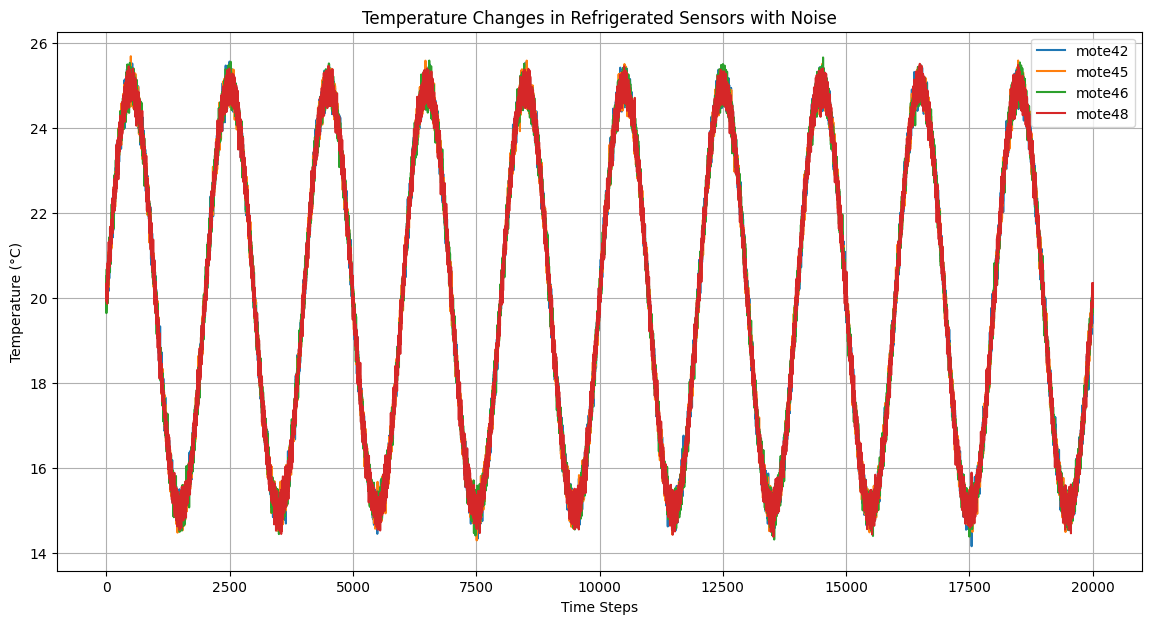

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 20000

# Define the nodes (sensors)
nodes = [f'mote{i}' for i in range(1, 51)]

# Mean temperature for all nodes
z_mean = 20.0

# Amplitude A and period (full cycle in 2000 time steps)
A = 5
period = 2000

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Generate temperature data for nodes
for node in nodes:
    # Select noise parameter based on node
    if node in ['mote42', 'mote45', 'mote46', 'mote48']:
        noise_param = 0.2  # Larger noise for specific nodes
    else:
        noise_param = 0.2  # Smaller noise for the rest of the nodes
    
    # Generate the temperature using the given formula
    temperature = z_mean + A * np.sin(2 * np.pi * np.arange(time_steps) / period) + np.random.normal(loc=0, scale=noise_param, size=time_steps)
    data[node] = temperature  # Assign the generated temperature to the node

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_temp_main.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes in Refrigerated Sensors with Noise')
plt.legend()
plt.grid(True)
plt.show()


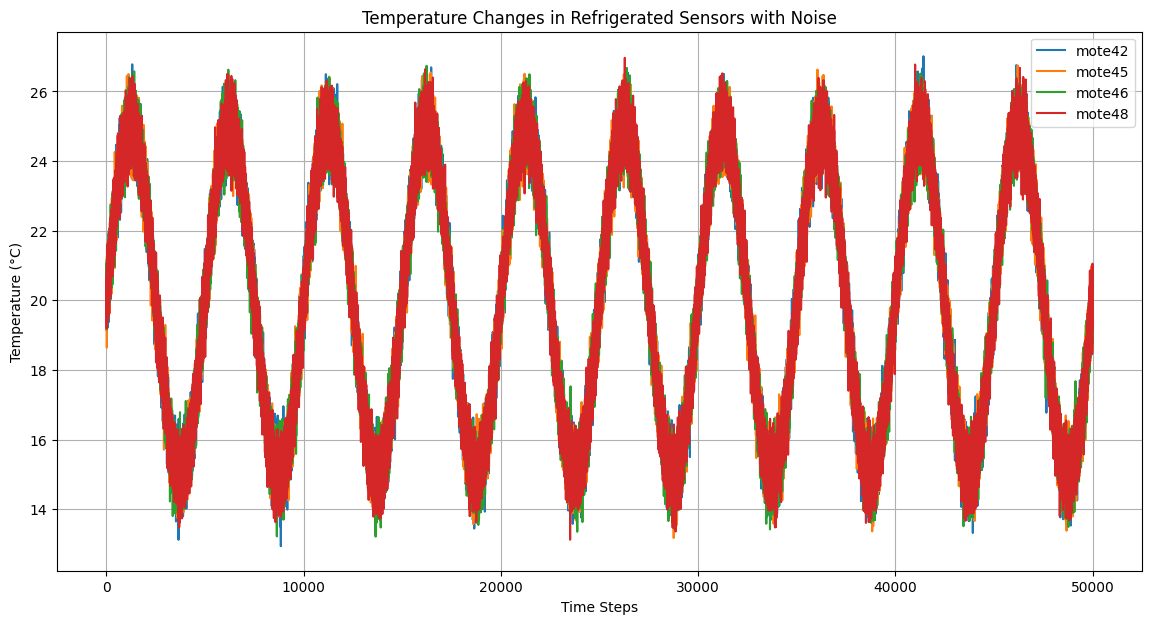

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 50000

# Define the nodes (sensors)
nodes = [f'mote{i}' for i in range(1, 51)]

# Mean temperature for all nodes
z_mean = 20.0

# Amplitude A and period (full cycle in 2000 time steps)
A = 5
period = 5000

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Generate temperature data for nodes
for node in nodes:
    # Select noise parameter based on node
    if node in ['mote42', 'mote45', 'mote46', 'mote48']:
        noise_param = 0.5  # Larger noise for specific nodes
    else:
        noise_param = 0.1 # Smaller noise for the rest of the nodes
    
    # Generate the temperature using the given formula
    temperature = z_mean + A * np.sin(2 * np.pi * np.arange(time_steps) / period) + np.random.normal(loc=0, scale=noise_param, size=time_steps)
    data[node] = temperature  # Assign the generated temperature to the node

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_temp.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes in Refrigerated Sensors with Noise')
plt.legend()
plt.grid(True)
plt.show()


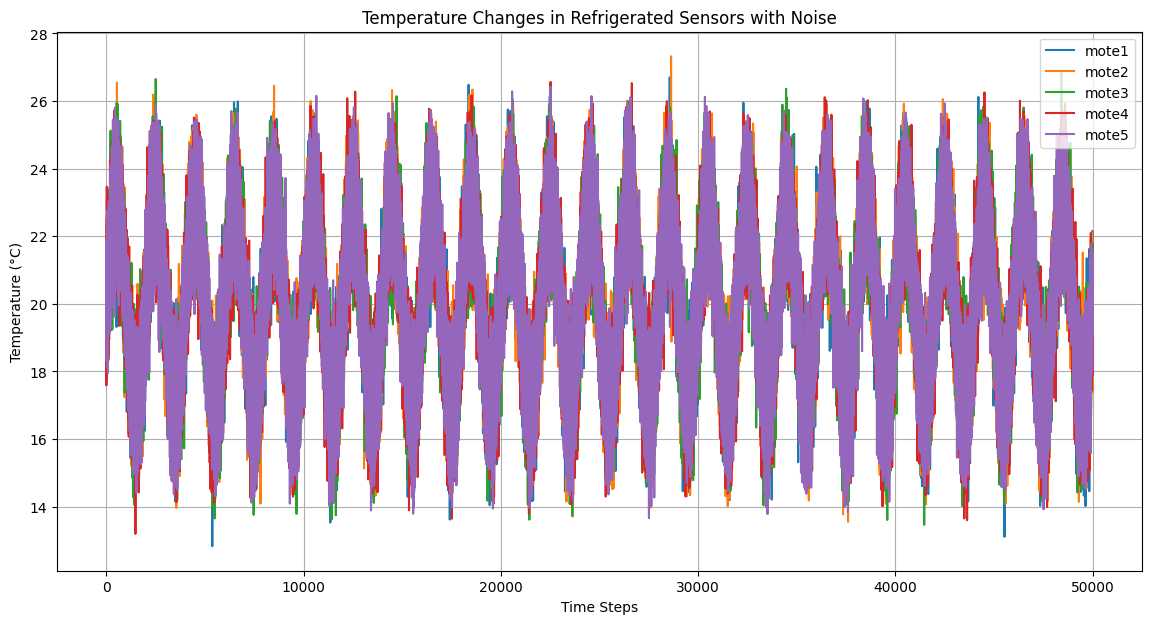

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 50000

# Define the nodes (sensors)
nodes = [f'mote{i}' for i in range(1, 51)]

# Mean temperature for all nodes
z_mean = 20.0

# Amplitude A and period (full cycle in 2000 time steps)
A = 3
period = 2000

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Generate temperature data for nodes
for node in nodes:
    # Select noise parameter based on node
    if node in ['mote1', 'mote2', 'mote3', 'mote4','mote5']:
        noise_param = 1  # Larger noise for specific nodes
        #temperature = z_mean + A * np.sin(2 * np.pi * np.arange(time_steps) / period) + np.random.normal(loc=0, scale=noise_param, size=time_steps)
    else:
        noise_param = 0.1  # Smaller noise for the rest of the nodes
        #temperature = z_mean + A * np.sin(2 * np.pi * np.arange(time_steps) / period) + np.random.normal(loc=0, scale=noise_param, size=time_steps)
    
    # Generate the temperature using the given formula
    temperature = z_mean + A * np.sin(2 * np.pi * np.arange(time_steps) / period) + np.random.normal(loc=0, scale=noise_param, size=time_steps)
    data[node] = temperature  # Assign the generated temperature to the node

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_two_main.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote1', 'mote2', 'mote3', 'mote4','mote5']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes in Refrigerated Sensors with Noise')
plt.legend()
plt.grid(True)
plt.show()


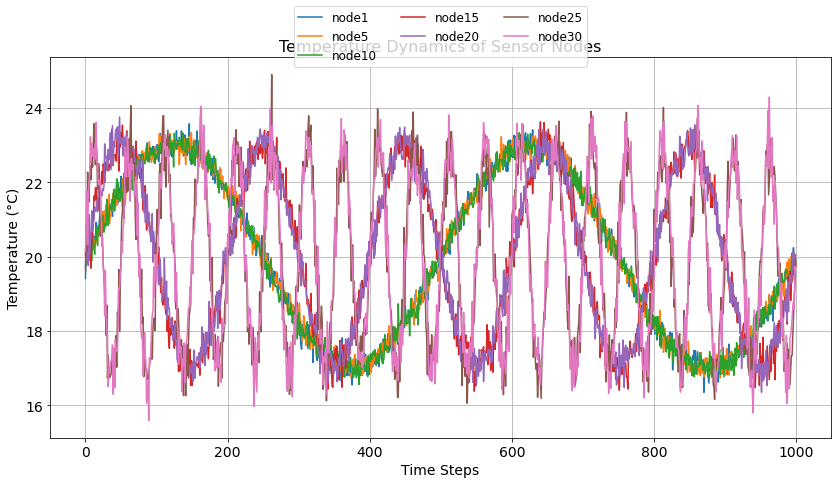

In [ ]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 50000

# Define the nodes (sensors) for 30 nodes
nodes = [f'node{i}' for i in range(1, 31)]

# Mean temperature for all nodes
z_mean = 20.0

# Define amplitude for all nodes
A_i = 3

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Generate temperature data for nodes based on categories
for node in nodes:
    node_id = int(node.replace('node', ''))  # Extract numeric ID
    
    # Assign parameters based on category
    if 1 <= node_id <= 10:  # Category A
        P_i = 500
        sigma_i = 0.2
    elif 11 <= node_id <= 20:  # Category B
        P_i = 200
        sigma_i = 0.3
    elif 21 <= node_id <= 30:  # Category C
        P_i = 50
        sigma_i = 0.5

    # Generate the temperature using the given equation
    temperature = z_mean + A_i * np.sin((2 * np.pi * np.arange(time_steps)) / P_i) + np.random.normal(loc=0, scale=sigma_i, size=time_steps)
    data[node] = temperature  # Assign the generated temperature to the node

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_filename = "/mnt/data/synthetic_scenario_30_nodes_corrected.csv"
df.to_csv(csv_filename, index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['node1', 'node5', 'node10', 'node15', 'node20', 'node25', 'node30']:  # Selecting a few nodes from each category
    plt.plot(df['SN'][:1000], df[node][:1000], label=node)  # Plot first 1000 time steps for clarity

plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Temperature Dynamics of Sensor Nodes', fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=12, ncol=3)
plt.grid(True)
plt.show()

# Provide the CSV file for download
csv_filename





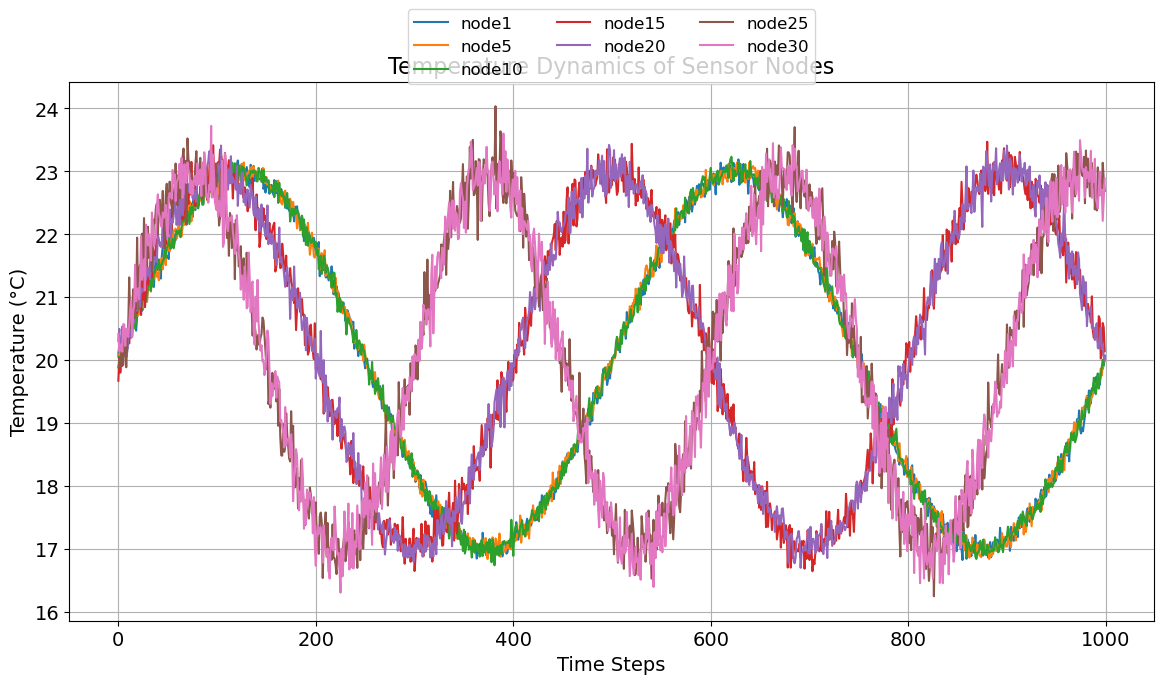

'synthetic_scenario_30_nodes_2.csv'

In [ ]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 50000

# Define the nodes (sensors) for 30 nodes
nodes = [f'node{i}' for i in range(1, 31)]

# Mean temperature for all nodes
z_mean = 20.0

# Define amplitude for all nodes
A_i = 5

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Generate temperature data for nodes based on categories
for node in nodes:
    node_id = int(node.replace('node', ''))  # Extract numeric ID
    
    # Assign parameters based on category
    if 1 <= node_id <= 10:  # Category A
        P_i = 100
        sigma_i = 0.1
    elif 11 <= node_id <= 20:  # Category B
        P_i = 400
        sigma_i = 0.2
    elif 21 <= node_id <= 30:  # Category C
        P_i = 300
        sigma_i = 0.3

    # Generate the temperature using the given equation
    temperature = z_mean + A_i * np.sin((2 * np.pi * np.arange(time_steps)) / P_i) + np.random.normal(loc=0, scale=sigma_i, size=time_steps)
    data[node] = temperature  # Assign the generated temperature to the node

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_filename = "synthetic_scenario_30_nodes_2.csv"
df.to_csv(csv_filename, index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['node1', 'node5', 'node10', 'node15', 'node20', 'node25', 'node30']:  # Selecting a few nodes from each category
    plt.plot(df['SN'][:1000], df[node][:1000], label=node)  # Plot first 1000 time steps for clarity

plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Temperature Dynamics of Sensor Nodes', fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=12, ncol=3)
plt.grid(True)
plt.show()

# Provide the CSV file for download
csv_filename




In [ ]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 50000

# Define the nodes (sensors) for 30 nodes
nodes = [f'node{i}' for i in range(1, 31)]

# Mean temperature for all nodes
z_mean = 20.0

# Define amplitude for all nodes
A_i = 5

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Generate temperature data for nodes based on categories
for node in nodes:
    node_id = int(node.replace('node', ''))  # Extract numeric ID
    
    # Assign parameters based on category
    if 1 <= node_id <= 10:  # Category A
        P_i = 500
        sigma_i = 0.1
    elif 11 <= node_id <= 20:  # Category B
        P_i = 400
        sigma_i = 0.2
    elif 21 <= node_id <= 30:  # Category C
        P_i = 300
        sigma_i = 0.3

    # Generate the temperature using the given equation
    temperature = z_mean + A_i * np.sin((2 * np.pi * np.arange(time_steps)) / P_i) + np.random.normal(loc=0, scale=sigma_i, size=time_steps)
    data[node] = temperature  # Assign the generated temperature to the node

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_filename = "synthetic_scenario_30_nodes_2.csv"
df.to_csv(csv_filename, index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['node1', 'node5', 'node10', 'node15', 'node20', 'node25', 'node30']:  # Selecting a few nodes from each category
    plt.plot(df['SN'][:1000], df[node][:1000], label=node)  # Plot first 1000 time steps for clarity

plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Temperature Dynamics of Sensor Nodes', fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=12, ncol=3)
plt.grid(True)
plt.show()

# Provide the CSV file for download
csv_filename




# Including humidity 

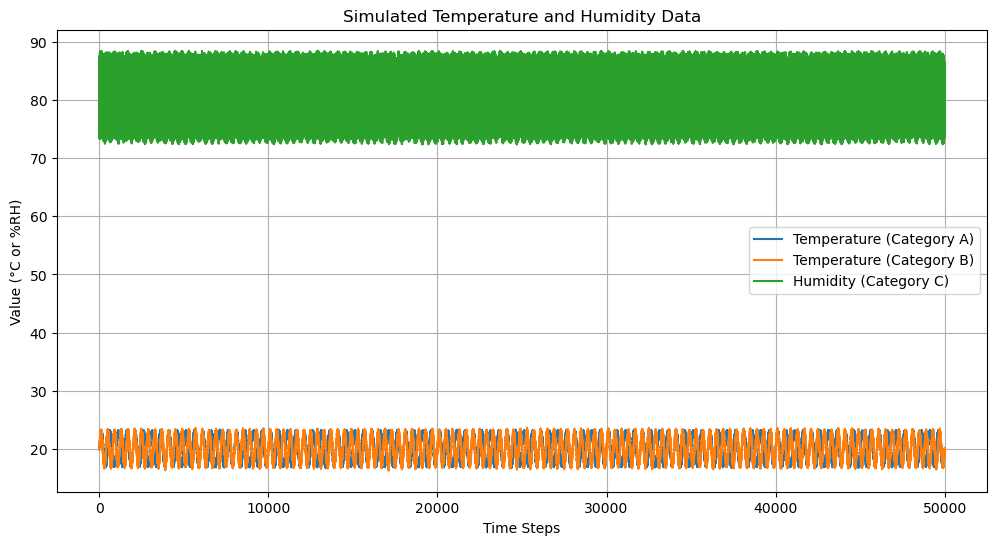

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 50000

# Define the nodes (sensors) for 30 nodes
nodes = [f'node{i}' for i in range(1, 31)]

# Mean temperature for all nodes
z_mean = 20.0
A_i = 3  # Amplitude for temperature variation

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Saturation vapor pressure function (Tetens’ formula)
def saturation_vapor_pressure(T):
    return 6.112 * np.exp((17.67 * T) / (T + 243.5))  # hPa

# Generate temperature and humidity data
for node in nodes:
    node_id = int(node.replace('node', ''))  # Extract numeric ID
    
    if 1 <= node_id <= 10:  # Category A (Temperature)
        P_i = 500
        sigma_i = 0.1
        temperature = z_mean + A_i * np.sin((2 * np.pi * np.arange(time_steps)) / P_i) + np.random.normal(loc=0, scale=sigma_i, size=time_steps)
        data[node] = temperature

    elif 11 <= node_id <= 20:  # Category B (Temperature)
        P_i = 400
        sigma_i = 0.2
        temperature = z_mean + A_i * np.sin((2 * np.pi * np.arange(time_steps)) / P_i) + np.random.normal(loc=0, scale=sigma_i, size=time_steps)
        data[node] = temperature

    elif 21 <= node_id <= 30:  # Category C (Humidity)
        P_i = 500
        sigma_i = 0.1
        
        # Select a temperature node from Category B to use for humidity calculation
        ref_temp_node = f'node{np.random.randint(11, 21)}'
        ref_temperature = data[ref_temp_node]  # Reference temperature for RH calculation

        # Assume the dew point is slightly lower than actual temperature
        dew_point = ref_temperature - np.random.uniform(2, 5, time_steps)

        # Compute relative humidity using RH = (es(Td) / es(T)) * 100
        humidity = (saturation_vapor_pressure(dew_point) / saturation_vapor_pressure(ref_temperature)) * 100
        data[node] = humidity  # Assign the calculated humidity to the node

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the generated data
df.to_csv("simulated_environment_data.csv", index=False)

# Plot sample temperature and humidity data
plt.figure(figsize=(12, 6))

# Sample a node from Category A (Temperature)
plt.plot(df['SN'], df['node2'], label="Temperature (Category A)")

# Sample a node from Category B (Temperature)
plt.plot(df['SN'], df['node12'], label="Temperature (Category B)")

# Sample a node from Category C (Humidity)
plt.plot(df['SN'], df['node22'], label="Humidity (Category C)")

plt.xlabel("Time Steps")
plt.ylabel("Value (°C or %RH)")
plt.title("Simulated Temperature and Humidity Data")
plt.legend()
plt.grid()
plt.show()


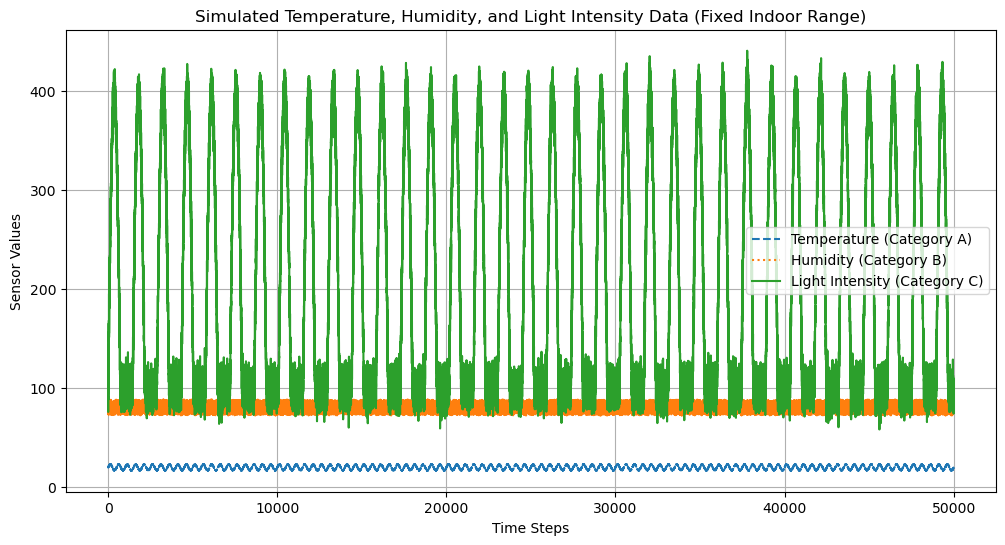

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 50000

# Define the nodes (sensors) for 30 nodes
nodes = [f'node{i}' for i in range(1, 31)]

# Mean temperature for all nodes
z_mean = 20.0  # Mean temperature (°C)
A_i = 3  # Amplitude for temperature variation

# Light intensity bounds (Fixed Range: 100 - 400 lux)
I_min = 100  # Minimum intensity
I_max = 400  # Maximum intensity
P_i = 1440   # Light cycle period (24-hour cycle)

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Saturation vapor pressure function (Tetens’ formula)
def saturation_vapor_pressure(T):
    return 6.112 * np.exp((17.67 * T) / (T + 243.5))  # hPa

# Generate temperature, humidity, and light intensity data
for node in nodes:
    node_id = int(node.replace('node', ''))  # Extract numeric ID
    
    if 1 <= node_id <= 10:  # Category A (Temperature)
        P_t = 500  # Temperature oscillation period
        sigma_t = 0.1  # Small noise variation
        temperature = z_mean + A_i * np.sin((2 * np.pi * np.arange(time_steps)) / P_t) + np.random.normal(loc=0, scale=sigma_t, size=time_steps)
        data[node] = temperature

    elif 11 <= node_id <= 20:  # Category B (Humidity)
        P_h = 400  # Humidity oscillation period
        sigma_h = 0.2
        temperature = z_mean + A_i * np.sin((2 * np.pi * np.arange(time_steps)) / P_h) + np.random.normal(loc=0, scale=sigma_h, size=time_steps)
        
        # Assume the dew point is slightly lower than actual temperature
        dew_point = temperature - np.random.uniform(2, 5, time_steps)

        # Compute relative humidity using RH = (es(Td) / es(T)) * 100
        humidity = (saturation_vapor_pressure(dew_point) / saturation_vapor_pressure(temperature)) * 100
        data[node] = humidity  # Assign the calculated humidity to the node

    elif 21 <= node_id <= 30:  # Category C (Light Intensity - Fixed Range)
        sigma_l = 10  # Small fluctuation for variability

        # Ensure light intensity stays within the range [100, 400] lux
        light_intensity = I_min + (I_max - I_min) * np.maximum(0, np.sin((2 * np.pi * np.arange(time_steps)) / P_i)) + np.random.normal(loc=0, scale=sigma_l, size=time_steps)
        
        data[node] = light_intensity  # Assign the generated light intensity

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the generated data
df.to_csv("simulated_environment_data.csv", index=False)

# Plot sample data from each category
plt.figure(figsize=(12, 6))

# Sample a node from Category A (Temperature)
plt.plot(df['SN'], df['node2'], label="Temperature (Category A)", linestyle="dashed")

# Sample a node from Category B (Humidity)
plt.plot(df['SN'], df['node12'], label="Humidity (Category B)", linestyle="dotted")

# Sample a node from Category C (Light Intensity)
plt.plot(df['SN'], df['node22'], label="Light Intensity (Category C)")

plt.xlabel("Time Steps")
plt.ylabel("Sensor Values")
plt.title("Simulated Temperature, Humidity, and Light Intensity Data (Fixed Indoor Range)")
plt.legend()
plt.grid()
plt.show()




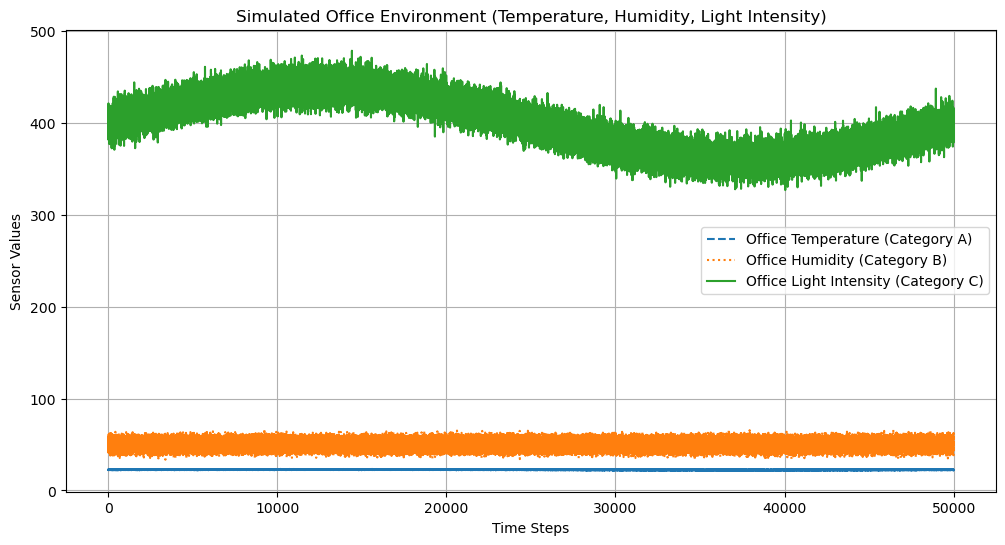

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 50000

# Define the nodes (sensors) for 30 nodes
nodes = [f'node{i}' for i in range(1, 31)]

# Define office temperature range
temp_min = 20.0  # Min indoor temperature (°C)
temp_max = 25.0  # Max indoor temperature (°C)
P_t = time_steps  # Long period to keep stable changes

# Light intensity bounds for office lighting (e.g., LED Panels)
I_min = 300  # Minimum intensity (dimmed lights)
I_max = 500  # Maximum intensity (full brightness)
P_l = time_steps  # Light cycle follows working hours

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Function for smooth room temperature variation (small fluctuations)
def room_temperature_variation(t, temp_min, temp_max, P):
    return temp_min + (temp_max - temp_min) * (0.5 + 0.05 * np.sin((2 * np.pi * t) / P))  # Small changes

# Generate temperature, humidity, and light intensity data
for node in nodes:
    node_id = int(node.replace('node', ''))  # Extract numeric ID
    
    if 1 <= node_id <= 10:  # Category A (Office Temperature)
        sigma_t = 0.2  # Small noise variation (room temperature is stable)
        temperature = room_temperature_variation(np.arange(time_steps), temp_min, temp_max, P_t) + np.random.normal(loc=0, scale=sigma_t, size=time_steps)
        data[node] = temperature

    elif 11 <= node_id <= 20:  # Category B (Humidity)
        sigma_h = 2.0  # Small fluctuations in humidity
        humidity = np.random.uniform(40, 60, time_steps) + np.random.normal(loc=0, scale=sigma_h, size=time_steps)  # Office humidity is typically 40-60%
        data[node] = humidity  # Assign the calculated humidity to the node

    elif 21 <= node_id <= 30:  # Category C (Office Light Intensity - LED Panels)
        sigma_l = 10  # Small fluctuation for minor adjustments
        light_intensity = I_min + (I_max - I_min) * (0.5 + 0.2 * np.sin((2 * np.pi * np.arange(time_steps)) / P_l)) + np.random.normal(loc=0, scale=sigma_l, size=time_steps)
        data[node] = light_intensity  # Assign the generated light intensity

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the generated data
df.to_csv("simulated_office_environment.csv", index=False)

# Plot sample data from each category
plt.figure(figsize=(12, 6))

# Sample a node from Category A (Temperature)
plt.plot(df['SN'], df['node2'], label="Office Temperature (Category A)", linestyle="dashed")

# Sample a node from Category B (Humidity)
plt.plot(df['SN'], df['node12'], label="Office Humidity (Category B)", linestyle="dotted")

# Sample a node from Category C (Light Intensity)
plt.plot(df['SN'], df['node22'], label="Office Light Intensity (Category C)")

plt.xlabel("Time Steps")
plt.ylabel("Sensor Values")
plt.title("Simulated Office Environment (Temperature, Humidity, Light Intensity)")
plt.legend()
plt.grid()
plt.show()



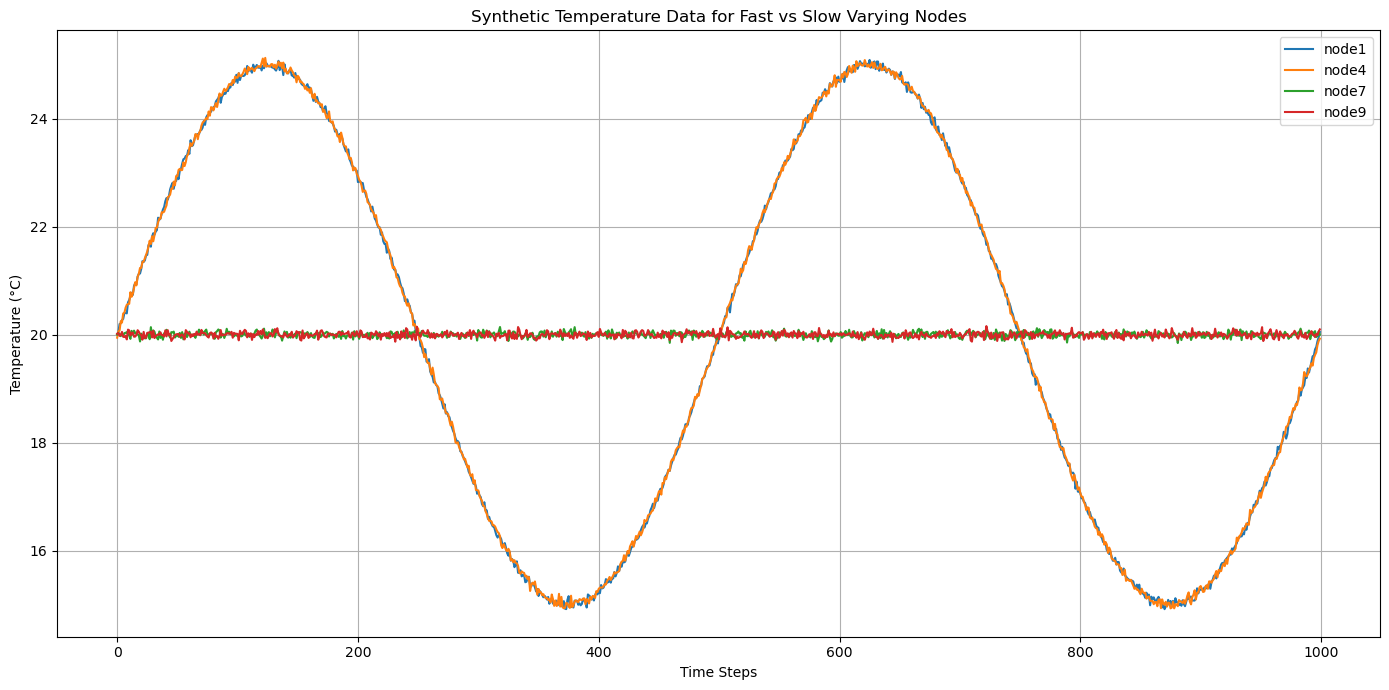

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
time_steps = 10000
nodes = [f'node{i}' for i in range(1, 11)]

# Initialize data dictionary with time steps
data = {'SN': np.arange(time_steps)}

# Generate temperature data for two categories of nodes
for node in nodes:
    node_id = int(node.replace('node', ''))

    # Category 1: Lower temperature range (15-25°C), faster varying
    if 1 <= node_id <= 5:
        z_mean = 20
        A_i = 5
        P_i = 500    # shorter period = faster variation
        sigma_i = 0.05

    # Category 2: Higher temperature range (80-120°C), slower varying
    elif 6 <= node_id <= 10:
        z_mean = 20.0
        A_i = 0
        P_i = 500     #longer period = slower variation
        sigma_i = 0.05

    temperature = z_mean + A_i * np.sin((2 * np.pi * np.arange(time_steps)) / P_i) + \
                  np.random.normal(loc=0, scale=sigma_i, size=time_steps)

    data[node] = temperature

# Create DataFrame
data['SN'] = np.arange(time_steps)
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv("synthetic_temp_polling_data.csv", index=False)

# Plot sample data from each category
plt.figure(figsize=(14, 7))
for node in ['node1', 'node4', 'node7', 'node9']:  # examples from both categories
    plt.plot(df['SN'][:1000], df[node][:1000], label=node)

plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Synthetic Temperature Data for Fast vs Slow Varying Nodes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

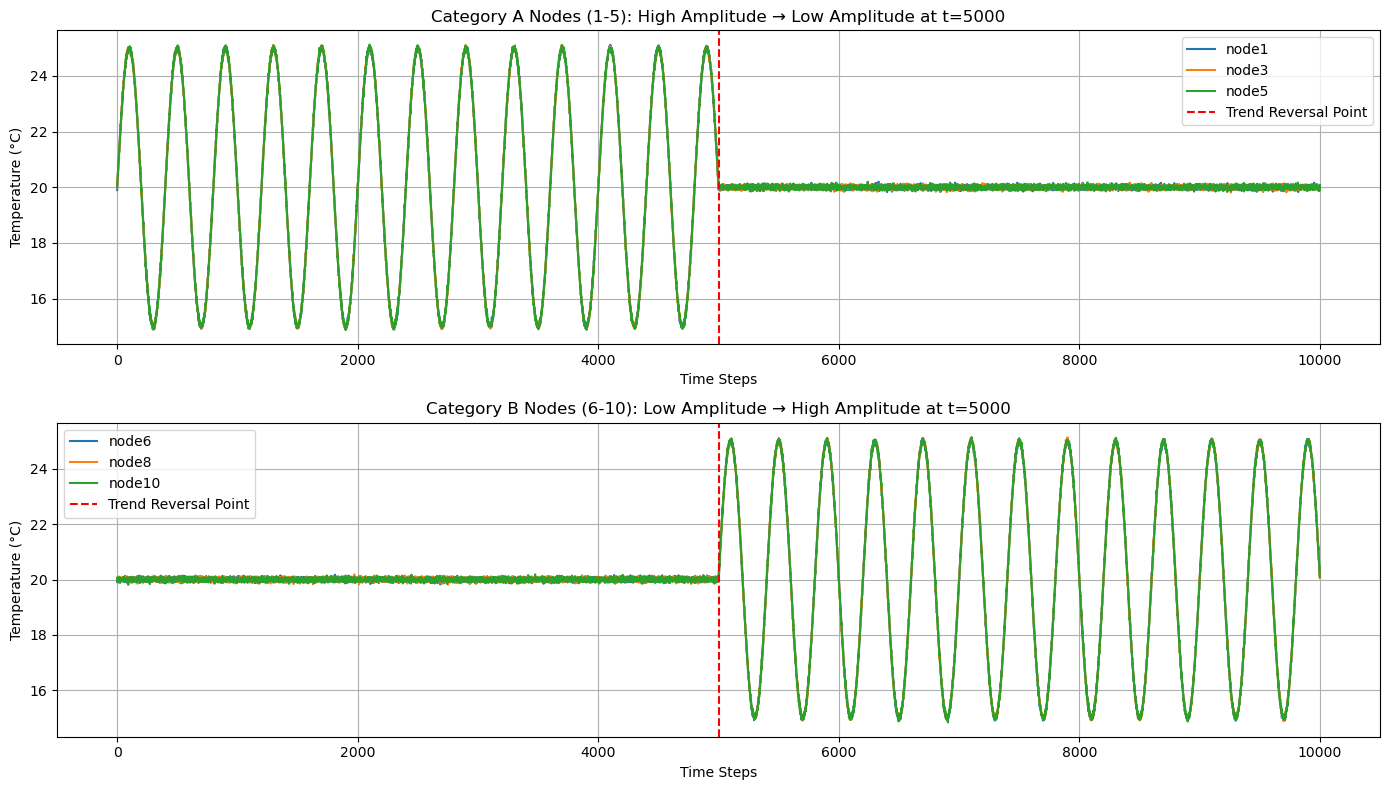

Data generated and saved to 'synthetic_temp_polling_data_reversed.csv'
Visualization saved to 'reversed_trend_data.png'


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
time_steps = 10000
nodes = [f'node{i}' for i in range(1, 11)]

# Initialize data dictionary with time steps
data = {'SN': np.arange(time_steps)}

# Generate temperature data for two categories of nodes with trend reversal at t=5000
for node in nodes:
    node_id = int(node.replace('node', ''))
    
    # Initialize arrays for the complete time series
    temperature = np.zeros(time_steps)
    
    # First half (t < 5000): Normal behavior
    # Category A (nodes 1-5): Higher amplitude, faster varying
    # Category B (nodes 6-10): Lower amplitude, slower varying
    
    # Second half (t >= 5000): Reversed behavior
    # Category A (nodes 1-5): Lower amplitude, slower varying (like Category B)
    # Category B (nodes 6-10): Higher amplitude, faster varying (like Category A)
    
    # First half (t < 5000)
    if 1 <= node_id <= 5:  # Category A
        z_mean = 20.0
        A_i_first = 5      # Higher amplitude
        P_i_first = 400    # Faster varying period
        sigma_i = 0.05
    elif 6 <= node_id <= 10:  # Category B
        z_mean = 20.0
        A_i_first = 0      # Lower amplitude
        P_i_first = 400    # Slower varying period
        sigma_i = 0.05
    
    # Generate the first half of the data (t < 5000)
    temperature[:5000] = z_mean + A_i_first * np.sin((2 * np.pi * np.arange(5000)) / P_i_first) + \
                        np.random.normal(loc=0, scale=sigma_i, size=5000)
    
    # Second half (t >= 5000) - Reverse the trends
    if 1 <= node_id <= 5:  # Category A takes on Category B behavior
        A_i_second = 0     # Now lower amplitude like Category B
        P_i_second = 400   # Now slower varying like Category B
    elif 6 <= node_id <= 10:  # Category B takes on Category A behavior
        A_i_second = 5     # Now higher amplitude like Category A
        P_i_second = 400   # Now faster varying like Category A
    
    # Generate the second half of the data (t >= 5000) - with reversed behavior
    # Use t-5000 as the starting point for the sine wave to ensure continuity
    time_offset = np.arange(5000, 10000) - 5000
    temperature[5000:] = z_mean + A_i_second * np.sin((2 * np.pi * time_offset) / P_i_second) + \
                        np.random.normal(loc=0, scale=sigma_i, size=5000)
    
    data[node] = temperature

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv("synthetic_temp_polling_data_reversed.csv", index=False)

# Plot sample data to show the trend reversal
plt.figure(figsize=(14, 8))

# Category A nodes
plt.subplot(2, 1, 1)
for node_id in [1, 3, 5]:  # Sample nodes from Category A
    node = f'node{node_id}'
    plt.plot(df['SN'], df[node], label=node)
plt.axvline(x=5000, color='red', linestyle='--', label='Trend Reversal Point')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Category A Nodes (1-5): High Amplitude → Low Amplitude at t=5000')
plt.legend()
plt.grid(True)

# Category B nodes
plt.subplot(2, 1, 2)
for node_id in [6, 8, 10]:  # Sample nodes from Category B
    node = f'node{node_id}'
    plt.plot(df['SN'], df[node], label=node)
plt.axvline(x=5000, color='red', linestyle='--', label='Trend Reversal Point')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Category B Nodes (6-10): Low Amplitude → High Amplitude at t=5000')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('reversed_trend_data.png')
plt.show()

print("Data generated and saved to 'synthetic_temp_polling_data_reversed.csv'")
print("Visualization saved to 'reversed_trend_data.png'")